In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Reviews.csv', nrows=5000)

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
data.shape

(5000, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [9]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2500.500000,1.580200,2.067200,4.150400,1.294930e+09
std,1443.520003,5.584533,6.288672,1.326549,4.802063e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,1250.750000,0.000000,0.000000,4.000000,1.271376e+09
50%,2500.500000,0.000000,1.000000,5.000000,1.309219e+09
75%,3750.250000,2.000000,2.000000,5.000000,1.330301e+09
max,5000.000000,187.000000,216.000000,5.000000,1.351210e+09


In [10]:
data.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [11]:
data.dropna(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data["Time"] = pd.to_datetime(data["Time"], unit="s")

In [15]:
data["Time"]

,Time
0,2011-04-27
1,2012-09-07
2,2008-08-18
3,2011-06-13
4,2012-10-21
...,...
4995,2012-07-03
4996,2012-07-01
4997,2012-05-11
4998,2012-07-13


In [19]:
data['HelpfulnessRatio'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']

In [20]:
data['HelpfulnessRatio']

,HelpfulnessRatio
0,1.0
1,NaN
2,1.0
3,1.0
4,NaN
...,...
4995,1.0
4996,1.0
4997,1.0
4998,NaN


In [21]:
data['ReviewLength'] = data['Text'].apply(lambda x: len(x.split()))

In [22]:
data['ReviewLength']

,ReviewLength
0,48
1,31
2,94
3,41
4,27
...,...
4995,105
4996,121
4997,105
4998,120


In [23]:
data['SummaryWordCount'] = data['Summary'].apply(lambda x: len(x.split()))

In [24]:
data['SummaryWordCount']

,SummaryWordCount
0,4
1,3
2,4
3,2
4,2
...,...
4995,6
4996,11
4997,7
4998,8


In [26]:
from textblob import TextBlob

data['SentimentScore'] = data['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [27]:
data['SentimentScore']

,SentimentScore
0,0.450000
1,-0.033333
2,0.133571
3,0.166667
4,0.483333
...,...
4995,-0.083333
4996,0.302273
4997,0.354615
4998,0.345417


In [28]:
data['ReviewAge'] = (pd.Timestamp.now() - data['Time']).dt.days

In [29]:
data['ReviewAge']

,ReviewAge
0,4902
1,4403
2,5884
3,4855
4,4359
...,...
4995,4469
4996,4471
4997,4522
4998,4459


In [30]:
data['DayOfWeek'] = data['Time'].dt.dayofweek

In [31]:
data['DayOfWeek']

,DayOfWeek
0,2
1,4
2,0
3,0
4,6
...,...
4995,1
4996,6
4997,4
4998,4


In [32]:
data['Month'] = data['Time'].dt.month

In [33]:
data['Month']

,Month
0,4
1,9
2,8
3,6
4,10
...,...
4995,7
4996,7
4997,5
4998,7


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocessing_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['CleanedSummary'] = data['Summary'].apply(preprocessing_text)
data['CleanedText'] = data['Text'].apply(preprocessing_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
data['CleanedSummary']

,CleanedSummary
0,good quality dog food
1,advertised
2,delight says
3,cough medicine
4,great taffy
...,...
4995,cavemen must wealthy
4996,cookies need work make home
4997,okay pinch great
4998,good except rainforest flavor


In [36]:
data['CleanedText']

,CleanedText
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...
...,...
4995,really wanted like thesebr br first cookies si...
4996,impressed cookies tried first came company one...
4997,cookies came sealed seem high quality ingredie...
4998,taste good arent like best things ever either ...


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ProfileName'] = le.fit_transform(data['ProfileName'])

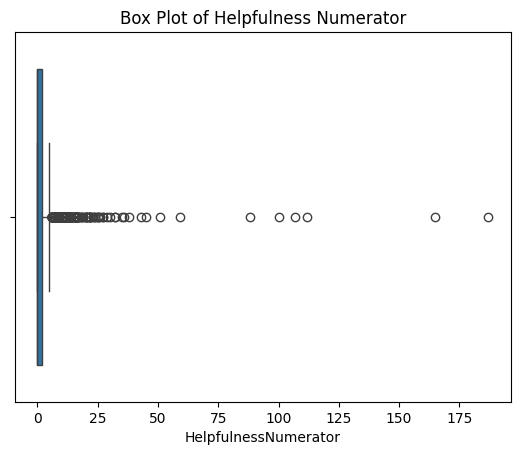

In [39]:
sns.boxplot(x=data['HelpfulnessNumerator'])
plt.title('Box Plot of Helpfulness Numerator')
plt.show()



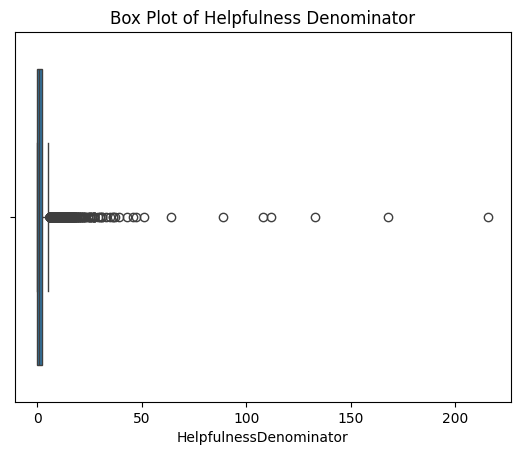

In [40]:
sns.boxplot(x=data['HelpfulnessDenominator'])
plt.title('Box Plot of Helpfulness Denominator')
plt.show()

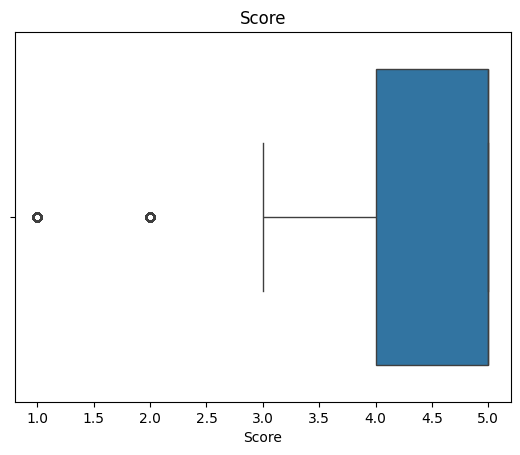

In [41]:
sns.boxplot(x=data['Score'])
plt.title('Score')
plt.show()

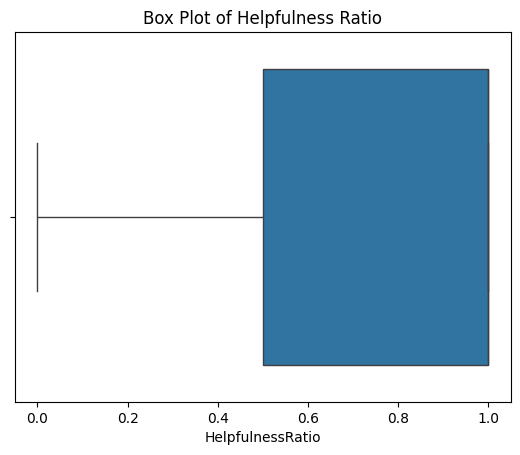

In [42]:
sns.boxplot(x=data['HelpfulnessRatio'])
plt.title('Box Plot of Helpfulness Ratio')
plt.show()

In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for HelpfulnessNumerator
Q1_num = data['HelpfulnessNumerator'].quantile(0.25)
Q3_num = data['HelpfulnessNumerator'].quantile(0.75)

# Calculate IQR for HelpfulnessNumerator
IQR_num = Q3_num - Q1_num

# Define lower and upper bound for HelpfulnessNumerator
lower_bound_num = Q1_num - 1.5 * IQR_num
upper_bound_num = Q3_num + 1.5 * IQR_num

# Identify outliers for HelpfulnessNumerator
outliers_num = data[(data['HelpfulnessNumerator'] < lower_bound_num) | (data['HelpfulnessNumerator'] > upper_bound_num)]

#  remove outliers for HelpfulnessNumerator
data_cleaned_num = data[~((data['HelpfulnessNumerator'] < lower_bound_num) | (data['HelpfulnessNumerator'] > upper_bound_num))]

print(f"Number of outliers in HelpfulnessNumerator: {len(outliers_num)}")

Number of outliers in HelpfulnessNumerator: 304


In [49]:
# Import the necessary library and class
from sklearn.preprocessing import StandardScaler

# Now you can use StandardScaler
scaler = StandardScaler()
data[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']] = scaler.fit_transform(data[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']])

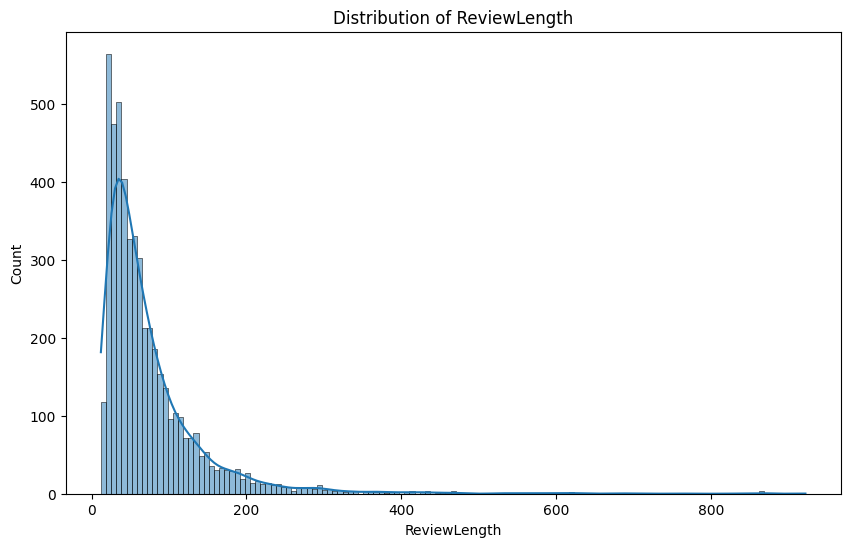

In [51]:
# Distribution of ReviewLength
plt.figure(figsize=(10, 6))
sns.histplot(data['ReviewLength'], kde=True)
plt.title('Distribution of ReviewLength')
plt.show()

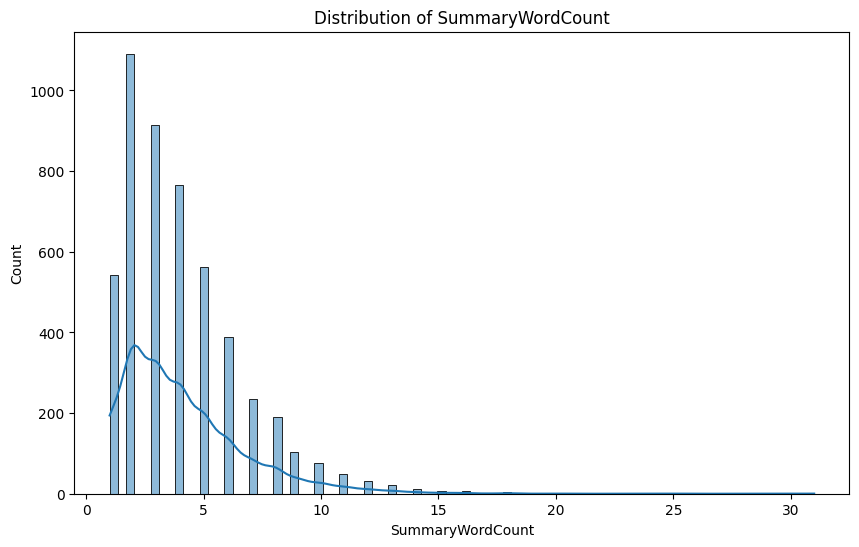

In [53]:
# Distribution of SummaryWordCount
plt.figure(figsize=(10, 6))
sns.histplot(data['SummaryWordCount'], kde=True)
plt.title('Distribution of SummaryWordCount')
plt.show()

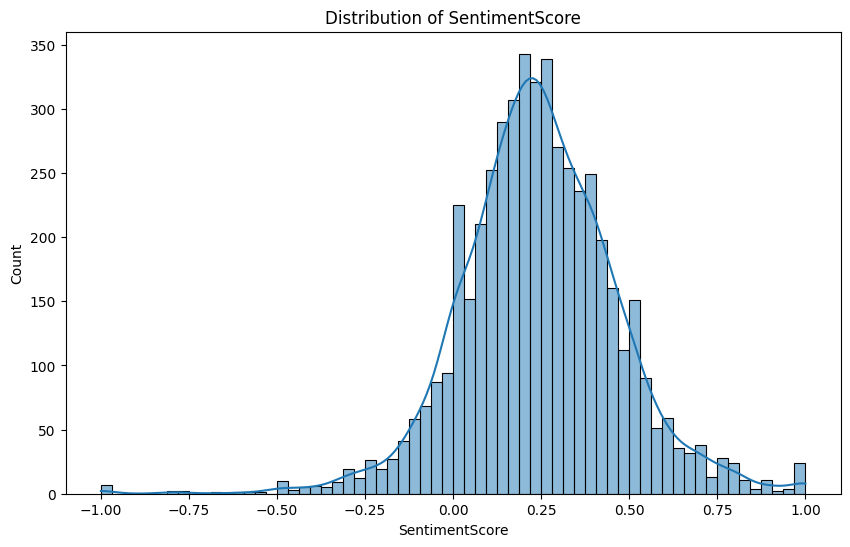

In [55]:
# Distribution of SentimentScore
plt.figure(figsize=(10, 6))
sns.histplot(data['SentimentScore'], kde=True)
plt.title('Distribution of SentimentScore')
plt.show()

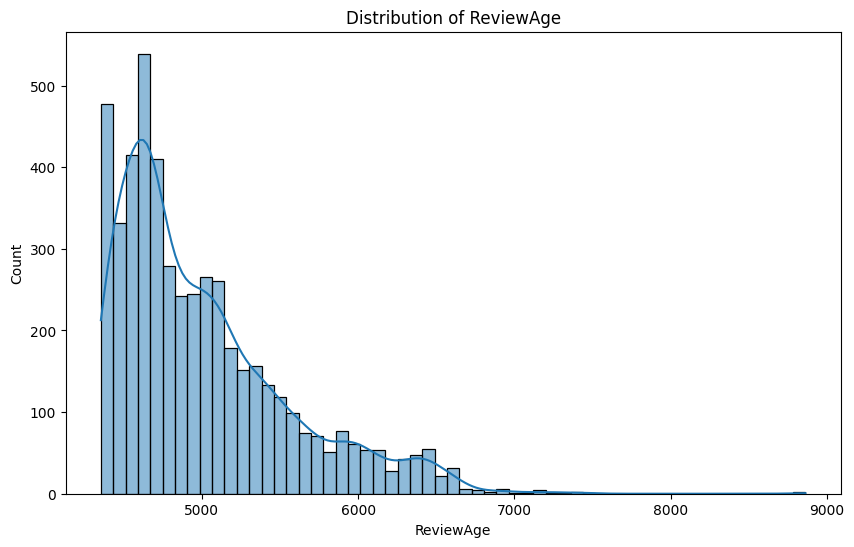

In [57]:
# Distribution of ReviewAge
plt.figure(figsize=(10, 6))
sns.histplot(data['ReviewAge'], kde=True)
plt.title('Distribution of ReviewAge')
plt.show()

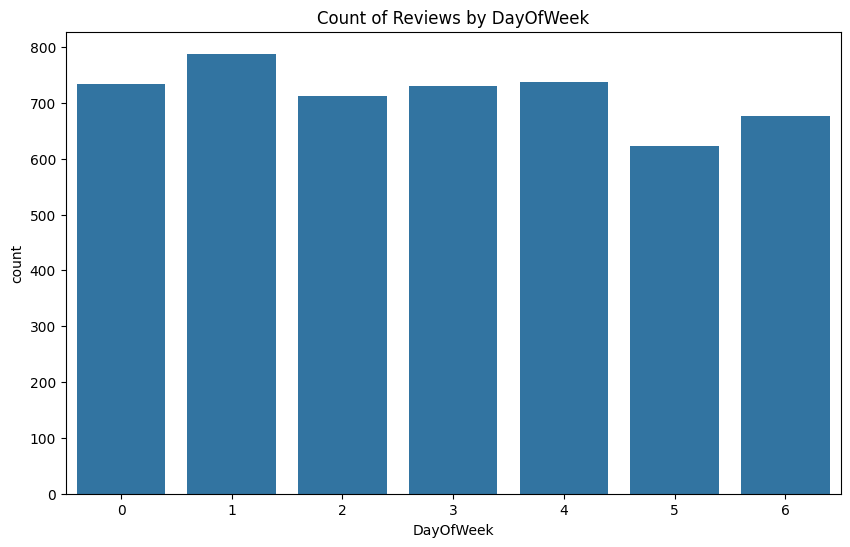

In [59]:
# Bar plot for DayOfWeek
plt.figure(figsize=(10, 6))
sns.countplot(x=data['DayOfWeek'])
plt.title('Count of Reviews by DayOfWeek')
plt.show()

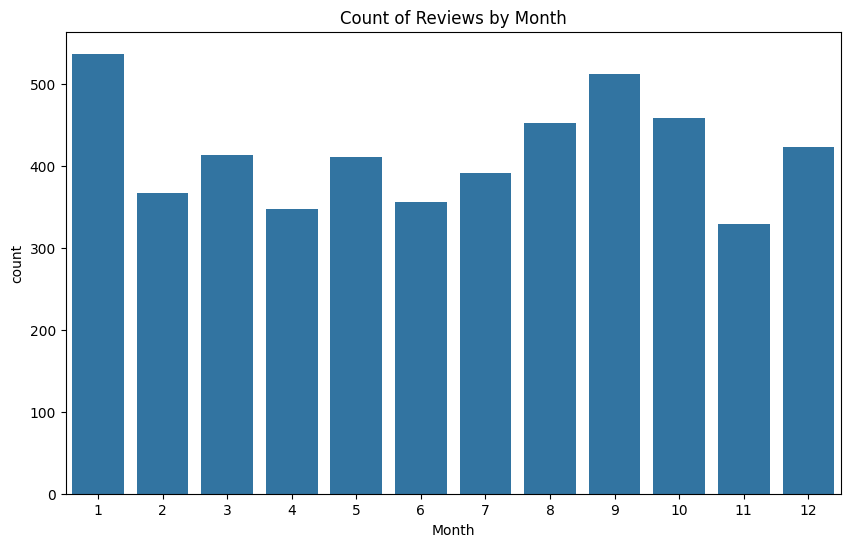

In [62]:
# Bar plot for Month
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Month'])
plt.title('Count of Reviews by Month')
plt.show()

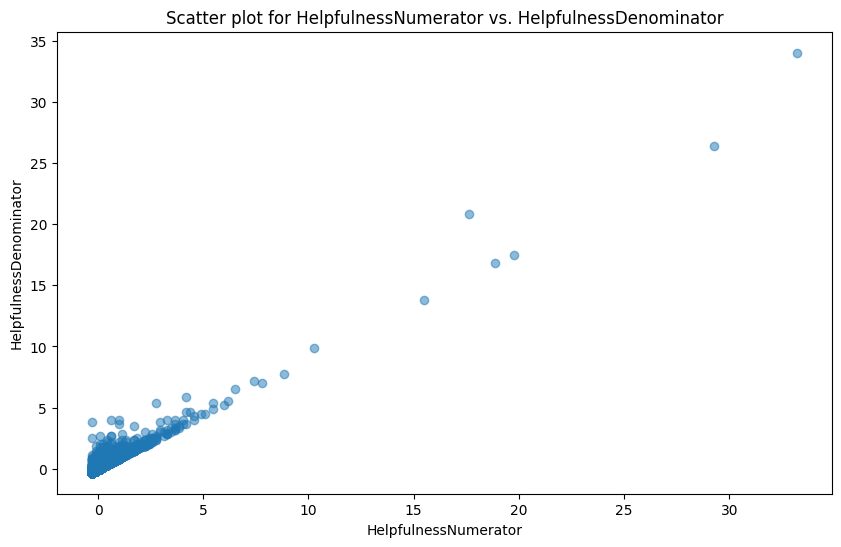

In [64]:
# Scatter plot for HelpfulnessNumerator vs. HelpfulnessDenominator
plt.figure(figsize=(10, 6))
plt.scatter(data['HelpfulnessNumerator'], data['HelpfulnessDenominator'], alpha=0.5)
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('HelpfulnessDenominator')
plt.title('Scatter plot for HelpfulnessNumerator vs. HelpfulnessDenominator')
plt.show()

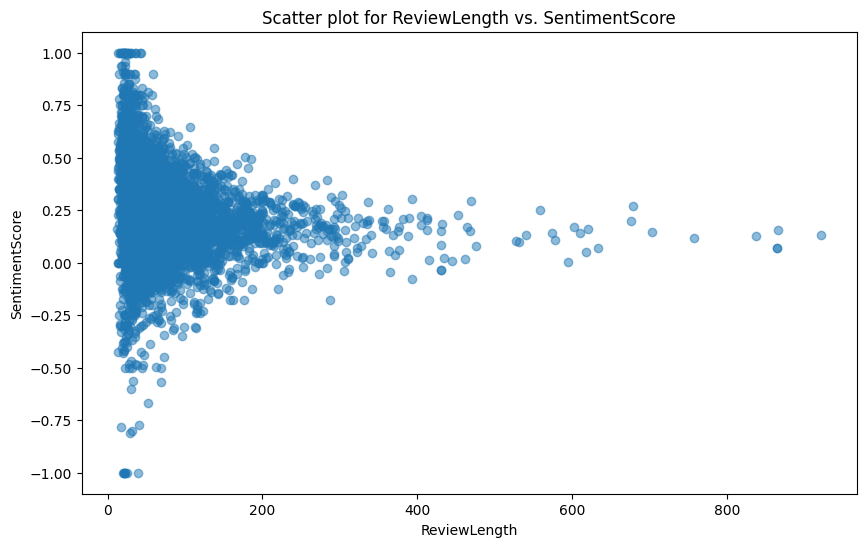

In [66]:
# Scatter plot for ReviewLength vs. SentimentScore
plt.figure(figsize=(10, 6))
plt.scatter(data['ReviewLength'], data['SentimentScore'], alpha=0.5)
plt.xlabel('ReviewLength')
plt.ylabel('SentimentScore')
plt.title('Scatter plot for ReviewLength vs. SentimentScore')
plt.show()

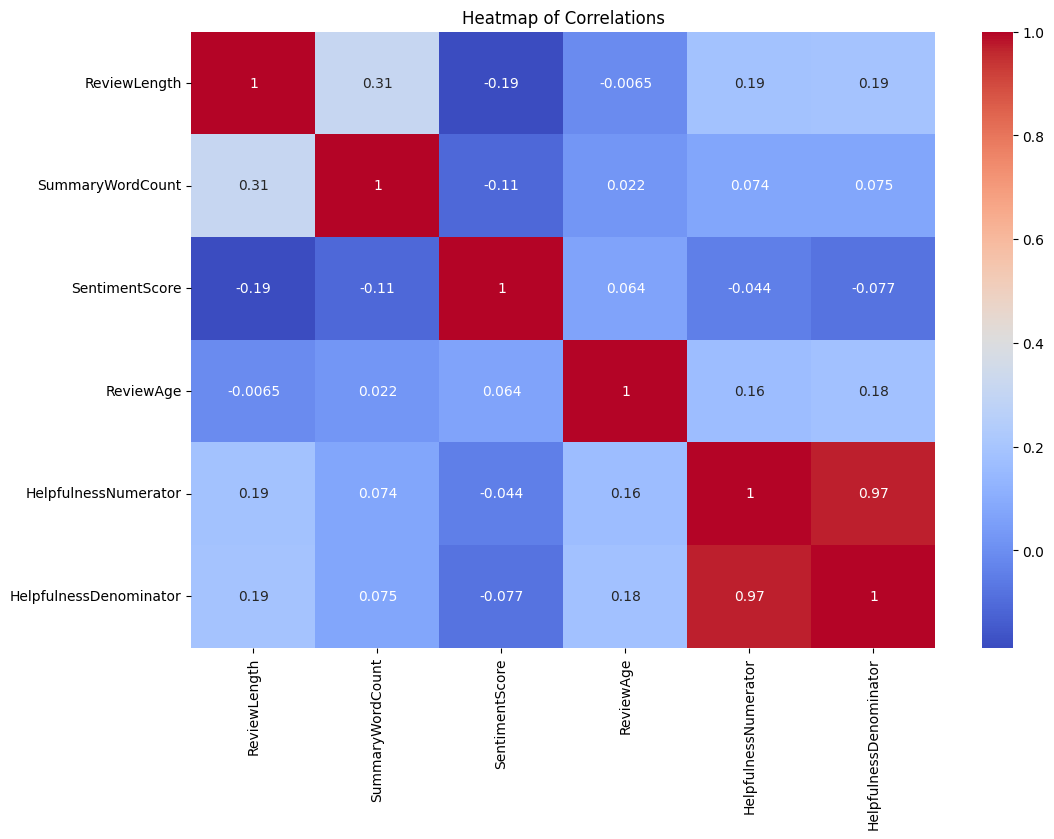

In [67]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data[['ReviewLength', 'SummaryWordCount', 'SentimentScore', 'ReviewAge', 'HelpfulnessNumerator', 'HelpfulnessDenominator']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

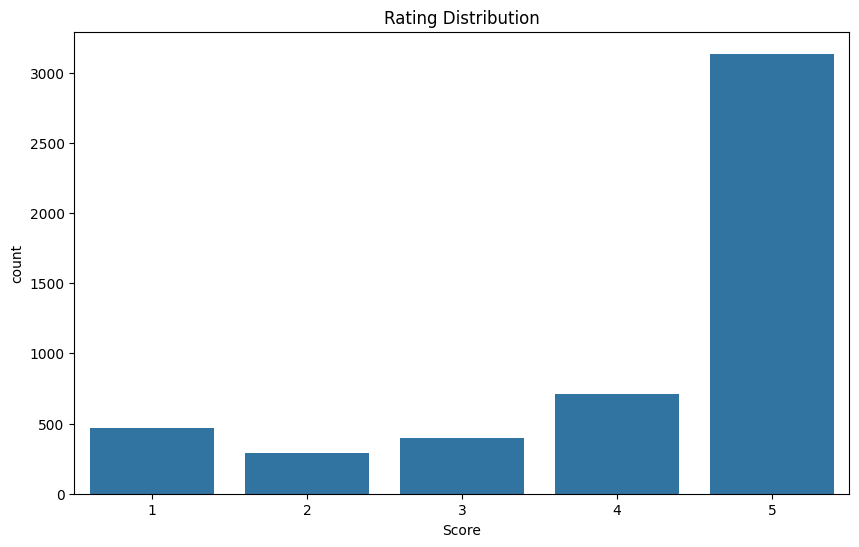

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=data)
plt.title('Rating Distribution')
plt.show()

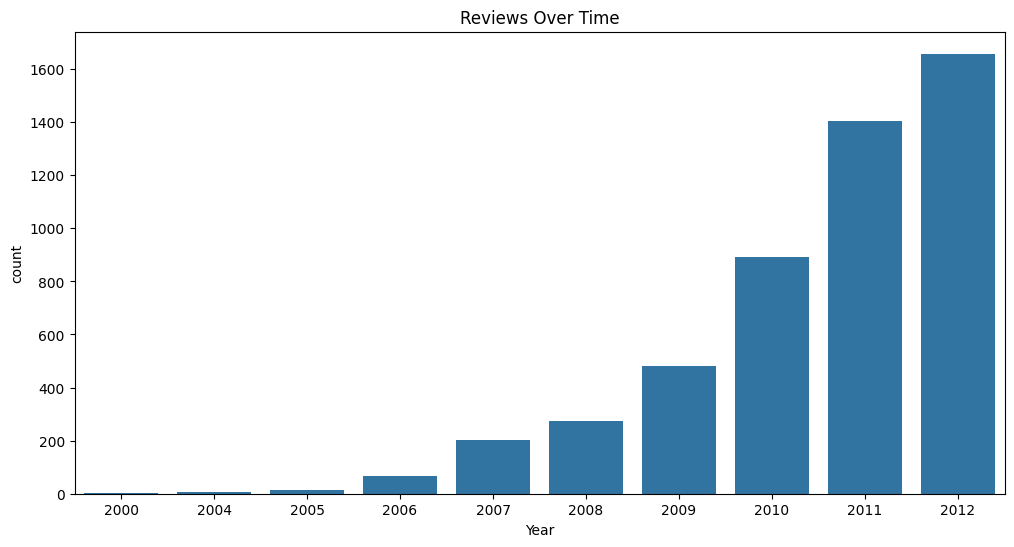

In [71]:
plt.figure(figsize=(12, 6))
data['Year'] = data['Time'].dt.year
sns.countplot(x='Year', data=data)
plt.title('Reviews Over Time')
plt.show()